Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
from pathlib import Path
import tensorflow as tf
# import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive/')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive/


In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
!unzip '/content/gdrive/MyDrive/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration.zip' -d '/content/gdrive/MyDrive/Dataset/'

Archive:  /content/gdrive/MyDrive/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration.zip
   creating: /content/gdrive/MyDrive/Dataset/Train/
   creating: /content/gdrive/MyDrive/Dataset/Train/vascular lesion/
  inflating: /content/gdrive/MyDrive/Dataset/Train/vascular lesion/ISIC_0024475.jpg  
  inflating: /content/gdrive/MyDrive/Dataset/Train/vascular lesion/ISIC_0024662.jpg  
  inflating: /content/gdrive/MyDrive/Dataset/Train/vascular lesion/ISIC_0024669.jpg  
  inflating: /content/gdrive/MyDrive/Dataset/Train/vascular lesion/ISIC_0024706.jpg  
  inflating: /content/gdrive/MyDrive/Dataset/Train/vascular lesion/ISIC_0024747.jpg  
  inflating: /content/gdrive/MyDrive/Dataset/Train/vascular lesion/ISIC_0024867.jpg  
  inflating: /content/gdrive/MyDrive/Dataset/Train/vascular lesion/ISIC_0024904.jpg  
  inflating: /content/gdrive/MyDrive/Dataset/Train/vascular lesion/ISIC_0025197.jpg  
  inflating: /content/gdrive/MyDrive/Dataset/Train/vascular lesion/ISIC_0025244.jpg  
  infl

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Dataset/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/Dataset/Test")

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


Lets plot few images as number

In [11]:
for images, labels in train_ds.take(1):
    for i in range(len(images)):
        image_number = tf.reshape(images[i], (img_height * img_width * 3)).numpy().astype("uint8")
        print(f"Image {i+1}: {image_number}")
        print(len(image_number))

Image 1: [53 34 53 ... 26 15 23]
97200
Image 2: [168 107 104 ... 177 133 130]
97200
Image 3: [210 143 159 ... 203 148 150]
97200
Image 4: [191 159 167 ... 196 154 169]
97200
Image 5: [193 193 185 ... 197 196 186]
97200
Image 6: [155 121 118 ... 112  79  72]
97200
Image 7: [ 0  0  0 ... 40 35 41]
97200
Image 8: [190 137 134 ... 187 140 134]
97200
Image 9: [188 151 154 ... 193 165 161]
97200
Image 10: [214 172 194 ... 206 160 168]
97200
Image 11: [185 149 133 ... 182 144 163]
97200
Image 12: [234 206 207 ... 210 181 184]
97200
Image 13: [217 127 137 ... 220 139 150]
97200
Image 14: [197 187 175 ... 167 157 147]
97200
Image 15: [176 135 142 ... 161 129 132]
97200
Image 16: [103  74  77 ... 210 175 180]
97200
Image 17: [163 157 145 ... 166 147 141]
97200
Image 18: [224 193 225 ... 207 171 186]
97200
Image 19: [77 62 62 ... 35 24 32]
97200
Image 20: [171 163 167 ... 180 165 165]
97200
Image 21: [181 136 101 ... 205 198 169]
97200
Image 22: [197 186 194 ... 204 188 196]
97200
Image 23: [214 

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

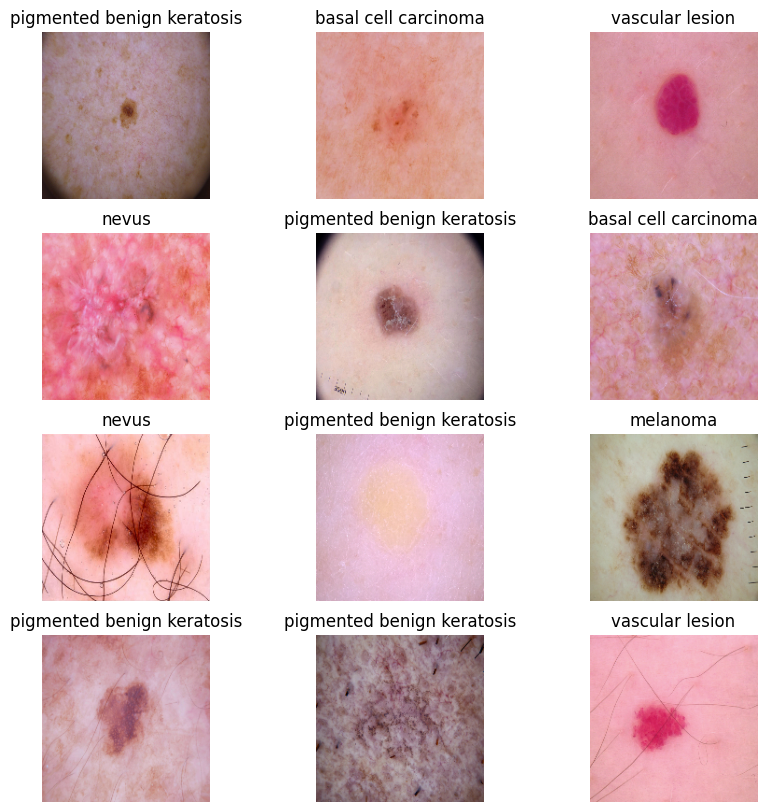

In [13]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
print(type(train_ds))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
print(type(train_ds))
print(len(train_ds))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
56


### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [17]:
### Your code goes here
num_classes = 9

#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)), # scaling in the range (0, 1)
  #2D convolution layer (e.g. spatial convolution over images).
  layers.Conv2D(16, 3, padding='same', activation='relu'),

  #We slide over the feature map and extract tiles of a specified size.
  #Downsamples the input along its spatial dimensions (height and width) by taking
  #the maximum value over an input window (of size defined by pool_size) for each channel of the input.
  layers.MaxPooling2D(),

  #We slide over the feature map and extract tiles of a specified size.
  layers.Conv2D(32, 3, padding='same', activation='relu'),

  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),

  #We slide over the feature map and extract tiles of a specified size.
  #Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting
  layers.MaxPooling2D(),

  #Flattening - Convert into 1D feature vector.  Flattens all its structure to create a single long feature vector
  ##Flattens the input. Does not affect the batch size.
  layers.Flatten(),

  #fully connected layer
  #A hidden layer in which each node is connected to every node in the subsequent hidden layer.
  #A fully connected layer is also known as a dense layer.

  layers.Dense(128, activation='relu'),

  #Dense is the only actual network layer in that model. A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.
  #It's the most basic layer in neural networks. A Dense(10) has ten neurons. A Dense(512) has 512 neurons.
  #Dense implements the operation: output = activation(dot(input, kernel)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
  layers.Dense(num_classes)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
])



In [18]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [19]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model

In [20]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 27s 113ms/step - loss: 2.0538 - accuracy: 0.2455 - val_loss: 1.7897 - val_accuracy: 0.3647
Epoch 2/20
56/56 [==============================] - 1s 21ms/step - loss: 1.6408 - accuracy: 0.4074 - val_loss: 1.5193 - val_accuracy: 0.4899
Epoch 3/20
56/56 [==============================] - 1s 21ms/step - loss: 1.4522 - accuracy: 0.4799 - val_loss: 1.4454 - val_accuracy: 0.5123
Epoch 4/20
56/56 [==============================] - 2s 34ms/step - loss: 1.3391 - accuracy: 0.5458 - val_loss: 1.3734 - val_accuracy: 0.5257
Epoch 5/20
56/56 [==============================] - 1s 20ms/step - loss: 1.2495 - accuracy: 0.5586 - val_loss: 1.4192 - val_accuracy: 0.5257
Epoch 6/20
56/56 [==============================] - 1s 19ms/step - loss: 1.1625 - accuracy: 0.5915 - val_loss: 1.4363 - val_accuracy: 0.5123
Epoch 7/20
56/56 [==============================] - 1s 19ms/step - loss: 1.1071 - accuracy: 0.6083 - val_loss: 1.4973 - val_accuracy: 0.4631
Epoch 8/20


### Visualizing training results

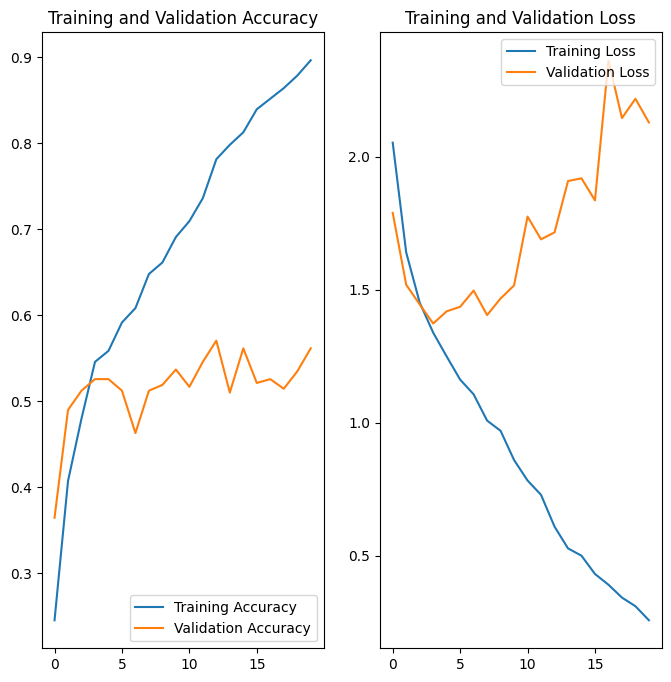

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### The preliminary model does good job on training data set, hence it can be said that model fitting is working, however, the model developed so far clear overfits as the Training accuracy reaches almost 90% while the validation accuracy is near 55 % after 20th epoch. The reason might be lack of sufficient data points in the training set. This may also be confirmed by increasing the layer or no. of parameters in a layer or both.

In [22]:
## new model by changing feature map in some of the initial layers and adding one extra layer before final flatten layer.

### Your code goes here
num_classes = 9

#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model1 = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  #2D convolution layer (e.g. spatial convolution over images).
  layers.Conv2D(32, 3, padding='same', activation='relu'),

  #We slide over the feature map and extract tiles of a specified size.
  #Downsamples the input along its spatial dimensions (height and width) by taking
  #the maximum value over an input window (of size defined by pool_size) for each channel of the input.
  layers.MaxPooling2D(),

  #We slide over the feature map and extract tiles of a specified size.
  layers.Conv2D(32, 3, padding='same', activation='relu'),

  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),

  #We slide over the feature map and extract tiles of a specified size.
  #Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting
  layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='relu'),

  #We slide over the feature map and extract tiles of a specified size.
  #Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting
  layers.MaxPooling2D(),

  #Flattening - Convert into 1D feature vector.  Flattens all its structure to create a single long feature vector
  ##Flattens the input. Does not affect the batch size.
  layers.Flatten(),

  #fully connected layer
  #A hidden layer in which each node is connected to every node in the subsequent hidden layer.
  #A fully connected layer is also known as a dense layer.

  layers.Dense(256, activation='relu'),

  #Dense is the only actual network layer in that model. A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.
  #It's the most basic layer in neural networks. A Dense(10) has ten neurons. A Dense(512) has 512 neurons.
  #Dense implements the operation: output = activation(dot(input, kernel)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
  layers.Dense(num_classes)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
])



In [23]:
# View the summary of all layers
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [24]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model

In [25]:
epochs = 20
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 38ms/step - loss: 2.0463 - accuracy: 0.1881 - val_loss: 1.9388 - val_accuracy: 0.2461
Epoch 2/20
56/56 [==============================] - 2s 30ms/step - loss: 1.9134 - accuracy: 0.2963 - val_loss: 1.8120 - val_accuracy: 0.3110
Epoch 3/20
56/56 [==============================] - 2s 27ms/step - loss: 1.6831 - accuracy: 0.4068 - val_loss: 1.5578 - val_accuracy: 0.4698
Epoch 4/20
56/56 [==============================] - 2s 27ms/step - loss: 1.5391 - accuracy: 0.4621 - val_loss: 1.5095 - val_accuracy: 0.4720
Epoch 5/20
56/56 [==============================] - 2s 27ms/step - loss: 1.4385 - accuracy: 0.4989 - val_loss: 1.3991 - val_accuracy: 0.5213
Epoch 6/20
56/56 [==============================] - 2s 27ms/step - loss: 1.3916 - accuracy: 0.5045 - val_loss: 1.4776 - val_accuracy: 0.4922
Epoch 7/20
56/56 [==============================] - 2s 27ms/step - loss: 1.3405 - accuracy: 0.5234 - val_loss: 1.3757 - val_accuracy: 0.4899
Epoch 8/20
56

### Visualizing training results

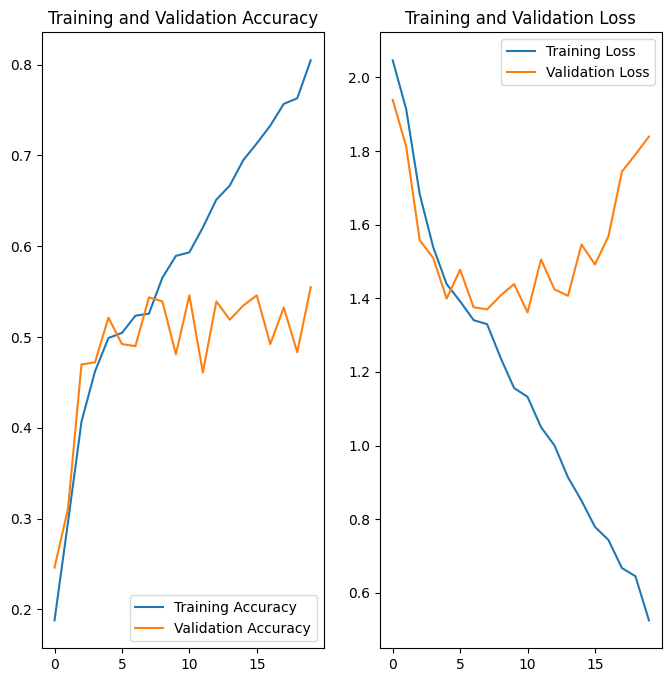

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### From above training results, it can be inferred that changing the model does not solve the problem of overfitting. Next step is to try some random augmentation of images in the training set.

In [35]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
data_augmentation_layers = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width,3)),
    layers.RandomRotation(0.1),
    # layers.RandomZoom(0.1),
    # layers.RandomTranslation(1,.5,fill_mode="reflect",interpolation="bilinear",seed=None,fill_value=0.0),
    # layers.RandomCrop(img_height,img_width)
])


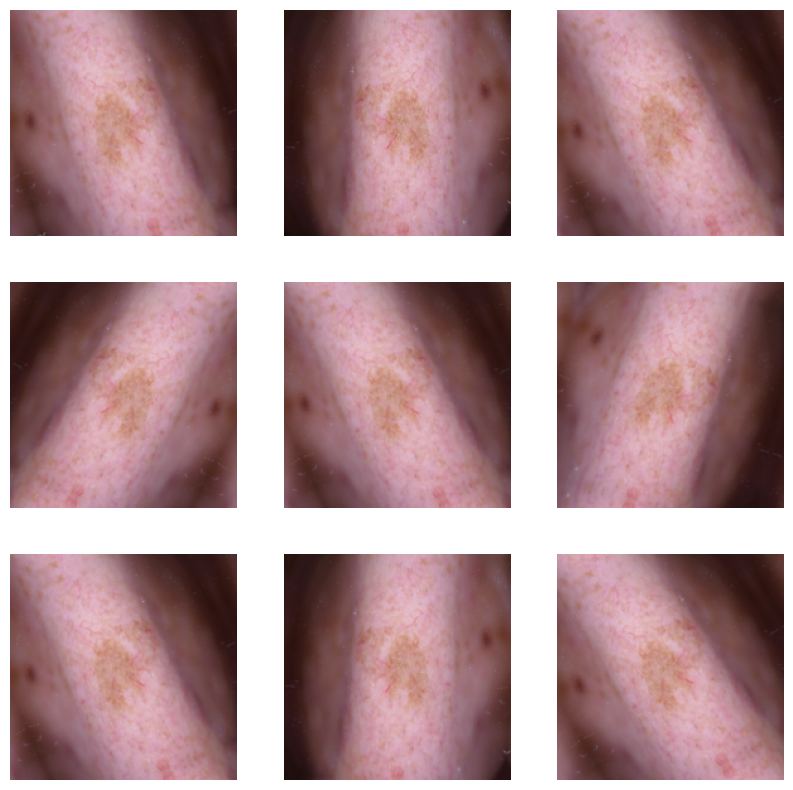

In [36]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation_layers(images)
#         print(len(augmented_images))
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [37]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

num_classes = 9
model2 = Sequential([
  data_augmentation_layers,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)

])


### Compiling the model

In [38]:
## Your code goes here
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [39]:
## Your code goes here,
## note: train your model for 20 epochs
epochs = 20
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 8s 73ms/step - loss: 5.4971 - accuracy: 0.2779 - val_loss: 7.4748 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 4s 69ms/step - loss: 1.8253 - accuracy: 0.4018 - val_loss: 7.7821 - val_accuracy: 0.1499
Epoch 3/20
56/56 [==============================] - 4s 74ms/step - loss: 1.5594 - accuracy: 0.4593 - val_loss: 8.1130 - val_accuracy: 0.1499
Epoch 4/20
56/56 [==============================] - 4s 69ms/step - loss: 1.4875 - accuracy: 0.4743 - val_loss: 6.7146 - val_accuracy: 0.1566
Epoch 5/20
56/56 [==============================] - 4s 69ms/step - loss: 1.3946 - accuracy: 0.5117 - val_loss: 5.0791 - val_accuracy: 0.1812
Epoch 6/20
56/56 [==============================] - 4s 75ms/step - loss: 1.3870 - accuracy: 0.5106 - val_loss: 9.9334 - val_accuracy: 0.1655
Epoch 7/20
56/56 [==============================] - 4s 69ms/step - loss: 1.3422 - accuracy: 0.5301 - val_loss: 2.4521 - val_accuracy: 0.1969
Epoch 8/20
56

### Visualizing the results

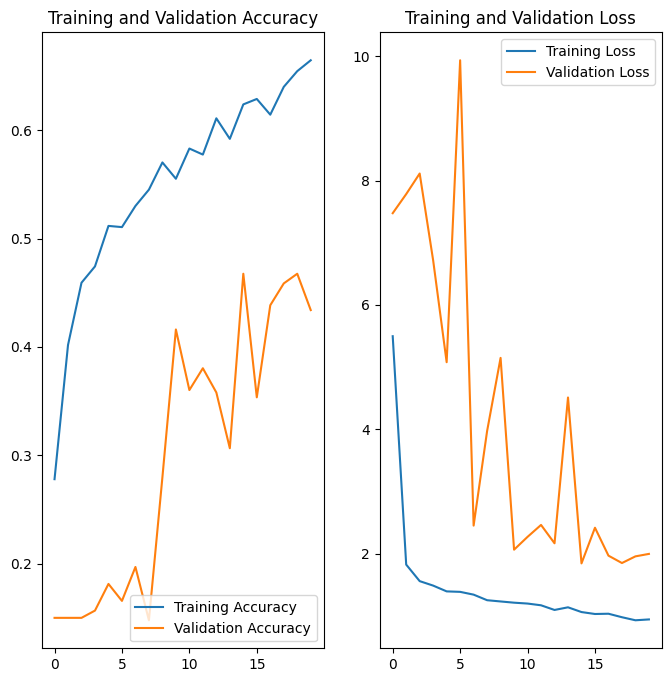

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Even after adding data augmentaion layer, dropout, and batchnormalisation, we do not see any significant improvent in overfitting. Further, dropouts might have also reduce the training accuracy. Moreover, the class imbalance may also be an issue for proper training.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [41]:
## Your code goes here.
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [45]:
original_df['Path'].iloc[0]

'/content/gdrive/MyDrive/Dataset/Train/vascular lesion/ISIC_0024475.jpg'

Class=8, n=139 (6.208%)
Class=7, n=181 (8.084%)
Class=6, n=77 (3.439%)
Class=5, n=462 (20.634%)
Class=4, n=357 (15.945%)
Class=3, n=438 (19.562%)
Class=2, n=95 (4.243%)
Class=1, n=376 (16.793%)
Class=0, n=114 (5.092%)


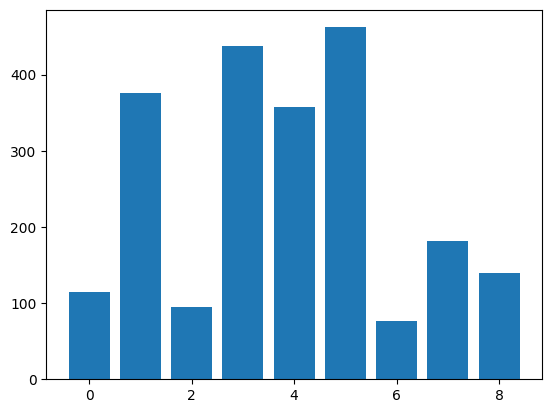

In [46]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
# print(y)
# print(counter)
# print(len(y))
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples? - Class 6 has least number of samples
#### - Which classes dominate the data in terms proportionate number of samples? - Class 5 dominates the data in terms proportionate number of samples


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [47]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [48]:
path_to_training_dataset="/content/gdrive/MyDrive/Dataset/Train//"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    # p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
    p.rotate90(probability=0.1)
    p.flip_top_bottom(probability=0.8)
    p.flip_left_right(probability=0.4)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Dataset/Train//actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=450x600 at 0x7F2414696EF0>: 100%|██████████| 500/500 [00:23<00:00, 21.56 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Dataset/Train//basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2414697FA0>: 100%|██████████| 500/500 [00:20<00:00, 24.84 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Dataset/Train//dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2414732140>: 100%|██████████| 500/500 [00:19<00:00, 25.47 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Dataset/Train//melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F2414507700>: 100%|██████████| 500/500 [01:22<00:00,  6.03 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Dataset/Train//nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F2414547430>: 100%|██████████| 500/500 [01:22<00:00,  6.02 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Dataset/Train//pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F241465E9B0>: 100%|██████████| 500/500 [00:20<00:00, 24.73 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Dataset/Train//seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=768x1024 at 0x7F2414557CA0>: 100%|██████████| 500/500 [00:40<00:00, 12.23 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Dataset/Train//squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F24145455D0>: 100%|██████████| 500/500 [00:19<00:00, 25.89 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Dataset/Train//vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2414528C10>: 100%|██████████| 500/500 [00:19<00:00, 26.31 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [49]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [50]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/Dataset/Train/vascular lesion/output/vascular lesion_original_ISIC_0026693.jpg_b84f2248-574b-4a53-afa5-666eaa2c24bb.jpg',
 '/content/gdrive/MyDrive/Dataset/Train/vascular lesion/output/vascular lesion_original_ISIC_0025425.jpg_09a674fa-0885-40e6-b6a6-f8974f7d4ab8.jpg',
 '/content/gdrive/MyDrive/Dataset/Train/vascular lesion/output/vascular lesion_original_ISIC_0032775.jpg_c0dc35df-9a85-4e16-9d88-20d6b9f2ae48.jpg',
 '/content/gdrive/MyDrive/Dataset/Train/vascular lesion/output/vascular lesion_original_ISIC_0025628.jpg_87cf4b2b-2451-4cfb-bd21-35b32724c67b.jpg',
 '/content/gdrive/MyDrive/Dataset/Train/vascular lesion/output/vascular lesion_original_ISIC_0033749.jpg_844a2710-d60b-4ac0-9c24-485c782919e0.jpg',
 '/content/gdrive/MyDrive/Dataset/Train/vascular lesion/output/vascular lesion_original_ISIC_0030606.jpg_fadf72b7-3aa7-46d1-94f5-5a2b1caa1d15.jpg',
 '/content/gdrive/MyDrive/Dataset/Train/vascular lesion/output/vascular lesion_original_ISIC_0028680.jpg_7d2412e

In [51]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',


In [52]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [53]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
# new_df = original_df.append(df2)
frames = [original_df, df2]
new_df = pd.concat(frames)
new_df

,Path,Label
0,/content/gdrive/MyDrive/Dataset/Train/vascular...,vascular lesion
1,/content/gdrive/MyDrive/Dataset/Train/vascular...,vascular lesion
2,/content/gdrive/MyDrive/Dataset/Train/vascular...,vascular lesion
3,/content/gdrive/MyDrive/Dataset/Train/vascular...,vascular lesion
4,/content/gdrive/MyDrive/Dataset/Train/vascular...,vascular lesion
...,...,...
4495,/content/gdrive/MyDrive/Dataset/Train/actinic ...,actinic keratosis
4496,/content/gdrive/MyDrive/Dataset/Train/actinic ...,actinic keratosis
4497,/content/gdrive/MyDrive/Dataset/Train/actinic ...,actinic keratosis
4498,/content/gdrive/MyDrive/Dataset/Train/actinic ...,actinic keratosis


In [54]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: count, dtype: int64

Class=8, n=639 (9.482%)
Class=7, n=681 (10.105%)
Class=6, n=577 (8.562%)
Class=5, n=962 (14.275%)
Class=4, n=857 (12.717%)
Class=3, n=938 (13.919%)
Class=2, n=595 (8.829%)
Class=1, n=876 (12.999%)
Class=0, n=614 (9.111%)


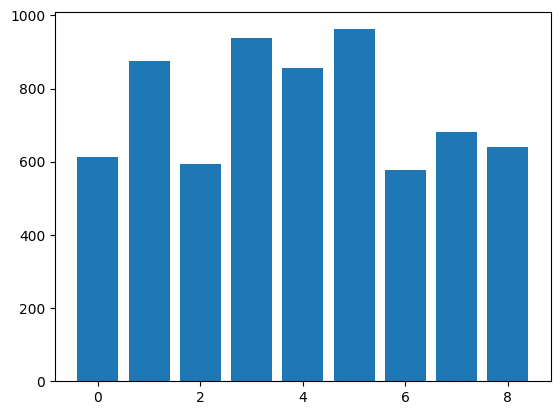

In [55]:
X, y = new_df['Path'], new_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
# print(y)
# print(counter)
# print(len(y))
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [56]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [57]:
# data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [58]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [59]:
num_classes = 9
model3 = Sequential([
  # data_augmentation_layers,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  # layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  # layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  # layers.Dropout(0.25),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  # layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(num_classes)
])

In [60]:
# View the summary of all layers
model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 batch_normalization_12 (Ba  (None, 180, 180, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 90, 90, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 90, 90, 32)        9248      
                                                                 
 batch_normalization_13 (Ba  (None, 90, 90, 32)       

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [61]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [62]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 50s 257ms/step - loss: 2.3099 - accuracy: 0.3316 - val_loss: 10.9507 - val_accuracy: 0.1195
Epoch 2/30
169/169 [==============================] - 44s 252ms/step - loss: 1.5934 - accuracy: 0.3952 - val_loss: 11.5295 - val_accuracy: 0.1188
Epoch 3/30
169/169 [==============================] - 46s 264ms/step - loss: 1.4468 - accuracy: 0.4510 - val_loss: 1.5798 - val_accuracy: 0.4425
Epoch 4/30
169/169 [==============================] - 44s 253ms/step - loss: 1.3884 - accuracy: 0.4703 - val_loss: 1.3150 - val_accuracy: 0.5286
Epoch 5/30
169/169 [==============================] - 43s 248ms/step - loss: 1.3056 - accuracy: 0.5002 - val_loss: 1.7029 - val_accuracy: 0.4425
Epoch 6/30
169/169 [==============================] - 42s 243ms/step - loss: 1.2099 - accuracy: 0.5417 - val_loss: 1.3125 - val_accuracy: 0.5174
Epoch 7/30
169/169 [==============================] - 43s 246ms/step - loss: 1.1604 - accuracy: 0.5486 - val_loss: 1.5367 - val_

#### **Todo:**  Visualize the model results

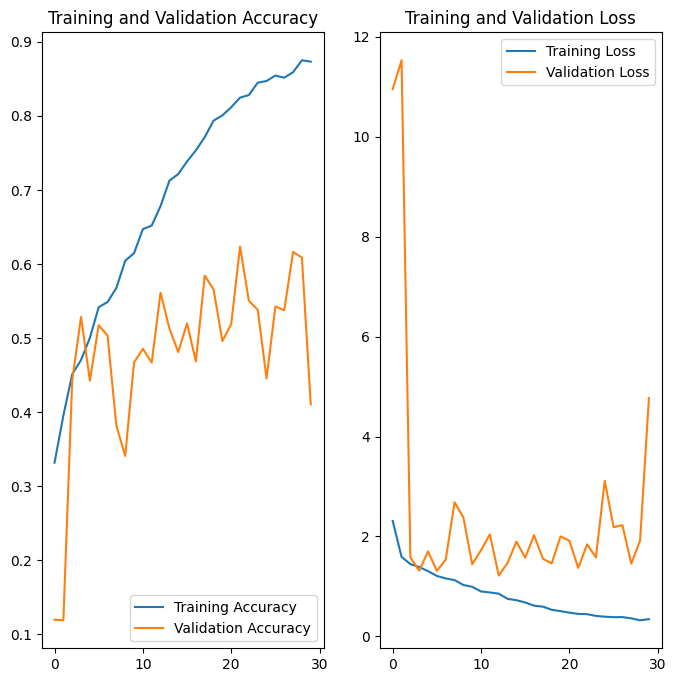

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [64]:
num_classes = 9
model4 = Sequential([
  # data_augmentation_layers,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  # layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  # layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  # layers.Dropout(0.25),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  # layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dropout(0.1),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(num_classes)
])

In [65]:
# View the summary of all layers
model4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 batch_normalization_16 (Ba  (None, 180, 180, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 90, 90, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 90, 90, 32)        9248      
                                                                 
 batch_normalization_17 (Ba  (None, 90, 90, 32)       

In [66]:
model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [67]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 46s 245ms/step - loss: 2.1143 - accuracy: 0.3741 - val_loss: 16.3982 - val_accuracy: 0.2123
Epoch 2/30
169/169 [==============================] - 44s 253ms/step - loss: 1.4495 - accuracy: 0.4405 - val_loss: 11.9922 - val_accuracy: 0.1604
Epoch 3/30
169/169 [==============================] - 47s 269ms/step - loss: 1.3715 - accuracy: 0.4648 - val_loss: 2.5302 - val_accuracy: 0.4061
Epoch 4/30
169/169 [==============================] - 45s 256ms/step - loss: 1.2578 - accuracy: 0.5150 - val_loss: 1.6444 - val_accuracy: 0.4536
Epoch 5/30
169/169 [==============================] - 43s 246ms/step - loss: 1.1996 - accuracy: 0.5365 - val_loss: 1.5296 - val_accuracy: 0.4439
Epoch 6/30
169/169 [==============================] - 43s 247ms/step - loss: 1.1397 - accuracy: 0.5675 - val_loss: 1.7271 - val_accuracy: 0.4024
Epoch 7/30
169/169 [==============================] - 44s 251ms/step - loss: 1.0193 - accuracy: 0.6031 - val_loss: 1.4899 - val_

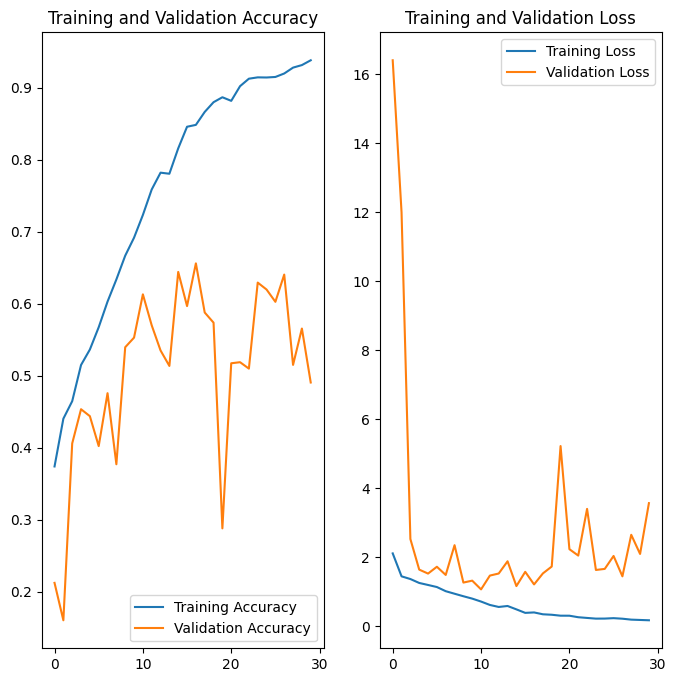

In [69]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

### Conclusion 1- The first vanilla model does very good job on the training data set, however there is clear indication of overfitting as the validation accuracy just reaches 55%.

### Conclusion 2 - It is tried to resolve the issue by changing the model architecture, however even that does not solve the issue completely.

### Conclusion 3 - Next, the the same model is trained with some random augmented images with some dropouts, which indicates that chnaging the model architecture with some dropouts and using more number of images in each class improve the model.

###  Conclusion 4 - Finally, the model created by adding some dropout layers and using the enlarged dataset, which shows a training accuracy above 90% and validation accuracy as high as 62%.

